# Technical TASK 2 :- Prediction using Unsupervised ML
In this task, we will predicting the optimum number of clusters in the Iris dataset using unsupervised machine learning, you can use the K-means clustering algorithm

Task Completed for The Sparks Foundation Internship Program
Data Science & Business Analytics Internship Task 2
### by: Ahmed Hesham Agamy

In [1]:
import os

# Set OMP_NUM_THREADS environment variable to 1
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
# Load the Iris dataset
url = "https://bit.ly/3kXTdox"
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


In [4]:
# Extract features
X = iris.data[:, :2]  # Using only the first two features for simplicity


In [5]:
# Find the optimum number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

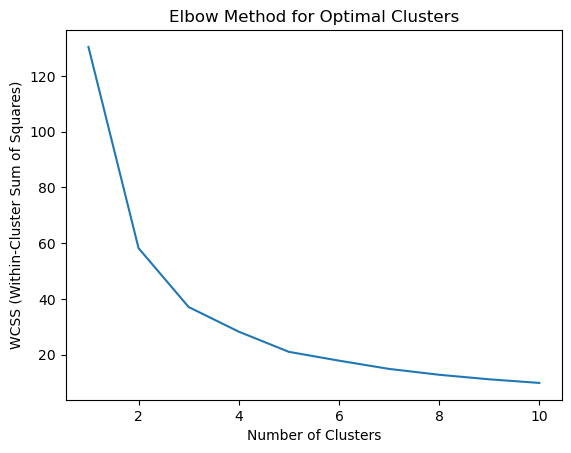

In [6]:
# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


In [7]:
# Based on the Elbow method, choose the optimal number of clusters
optimal_clusters = 3

In [8]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

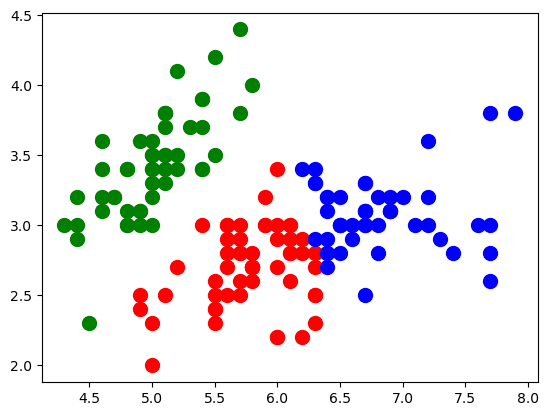

In [9]:
# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')


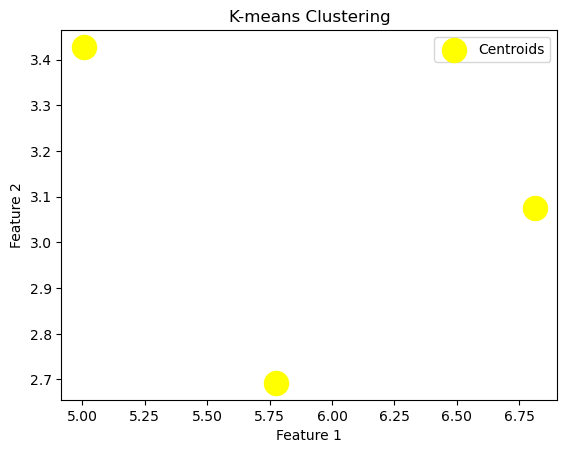

In [10]:
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()